In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
zomato_data = pd.read_csv('Zomato.csv', encoding='latin-1')

In [3]:
country_code = pd.read_excel('Country-Code.xlsx')

In [4]:
zomato_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
zomato_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
country_code.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [8]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df = pd.merge(zomato_data, country_code, on='Country Code', how='left')

In [10]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Data visualization

Univariate analysis

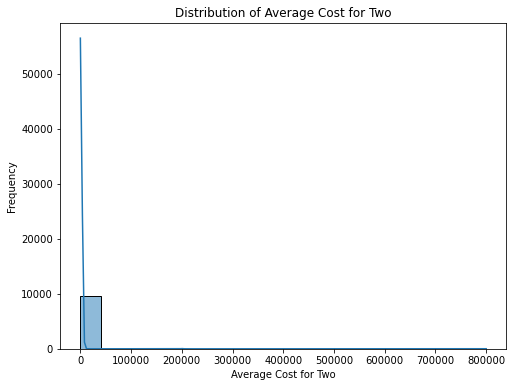

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Average Cost for two'], bins=20, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

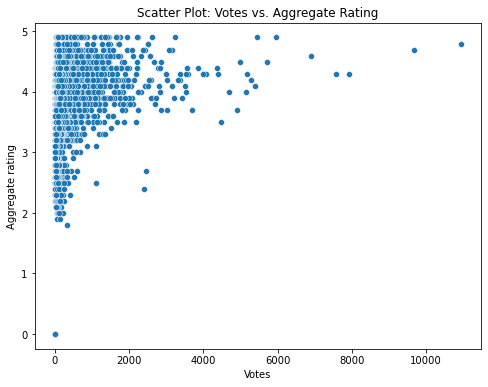

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Scatter Plot: Votes vs. Aggregate Rating')
plt.show()

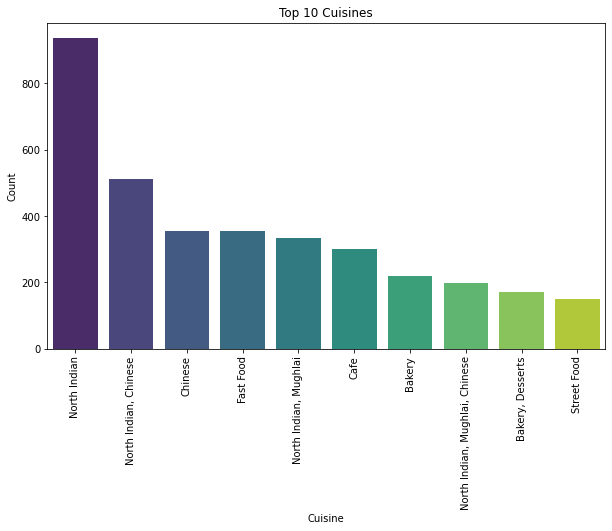

In [15]:
cuisine_counts = df['Cuisines'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

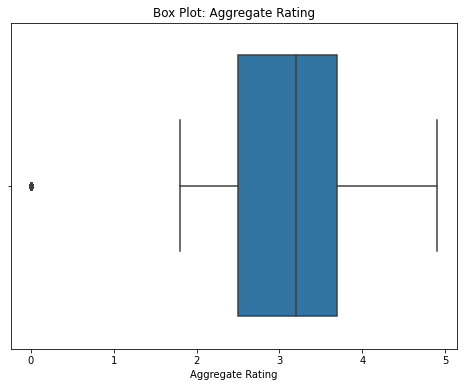

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Aggregate rating'])
plt.title('Box Plot: Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.show()

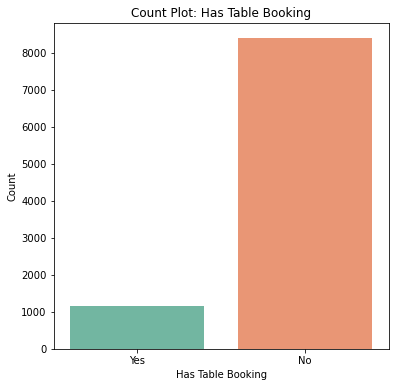

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Has Table booking', data=df, palette='Set2')
plt.title('Count Plot: Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')
plt.show()

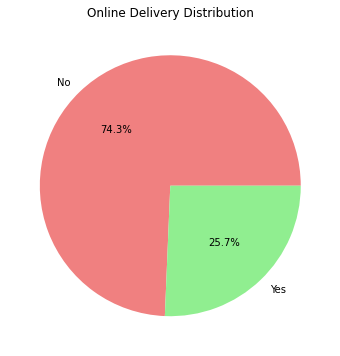

In [18]:
online_delivery_counts = df['Has Online delivery'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(online_delivery_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Online Delivery Distribution')
plt.show()

Bivariate analysis

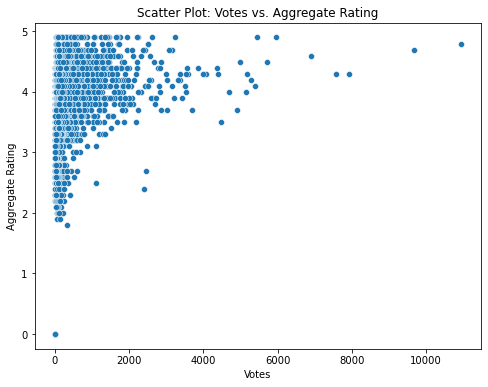

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Scatter Plot: Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

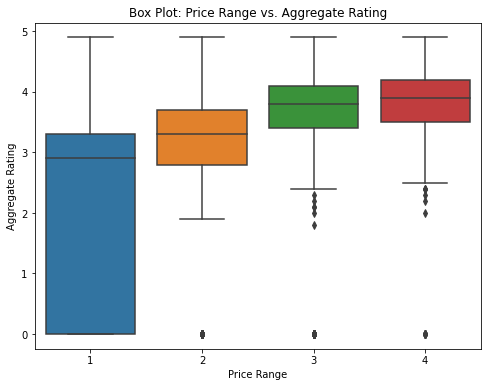

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Box Plot: Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

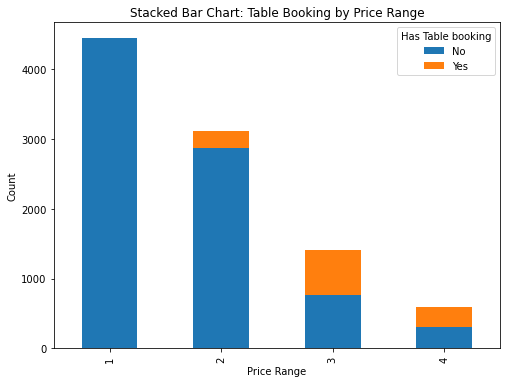

In [21]:
table_booking_price_range = df.groupby(['Price range', 'Has Table booking']).size().unstack()
table_booking_price_range.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Chart: Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

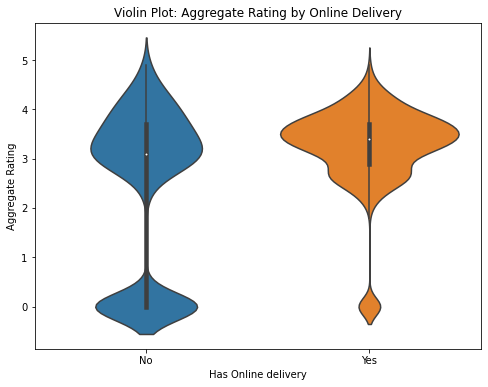

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.title('Violin Plot: Aggregate Rating by Online Delivery')
plt.xlabel('Has Online delivery')
plt.ylabel('Aggregate Rating')
plt.show()

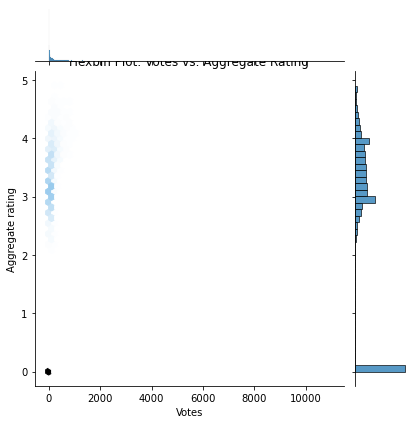

In [23]:
sns.jointplot(x='Votes', y='Aggregate rating', data=df, kind='hex')
plt.title('Hexbin Plot: Votes vs. Aggregate Rating')
plt.show()

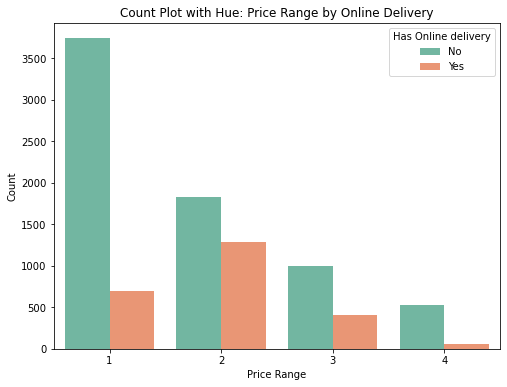

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=df, palette='Set2')
plt.title('Count Plot with Hue: Price Range by Online Delivery')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Multivariate analysis

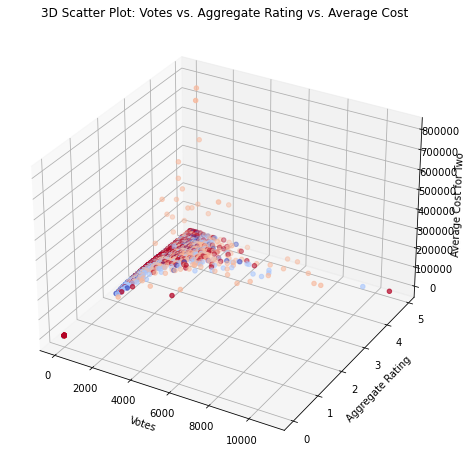

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Votes'], df['Aggregate rating'], df['Average Cost for two'], c=df['Price range'], cmap='coolwarm')
ax.set_xlabel('Votes')
ax.set_ylabel('Aggregate Rating')
ax.set_zlabel('Average Cost for Two')
plt.title('3D Scatter Plot: Votes vs. Aggregate Rating vs. Average Cost')
plt.show()

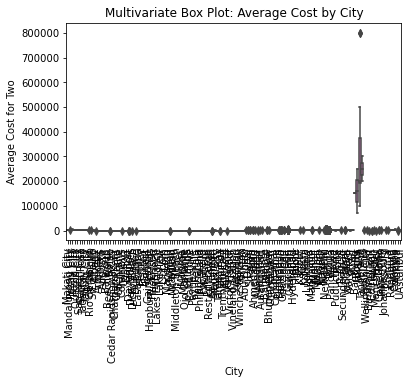

In [26]:
sns.boxplot(x='City', y='Average Cost for two', data=df)
plt.title('Multivariate Box Plot: Average Cost by City')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90)
plt.show()

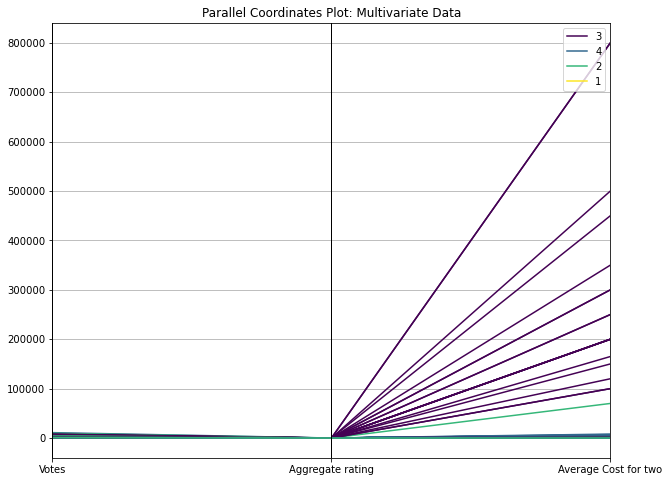

In [27]:
from pandas.plotting import parallel_coordinates
selected_vars = df[['Votes', 'Aggregate rating', 'Average Cost for two', 'Price range']]
plt.figure(figsize=(10, 8))
parallel_coordinates(selected_vars, 'Price range', colormap='viridis')
plt.title('Parallel Coordinates Plot: Multivariate Data')
plt.show()

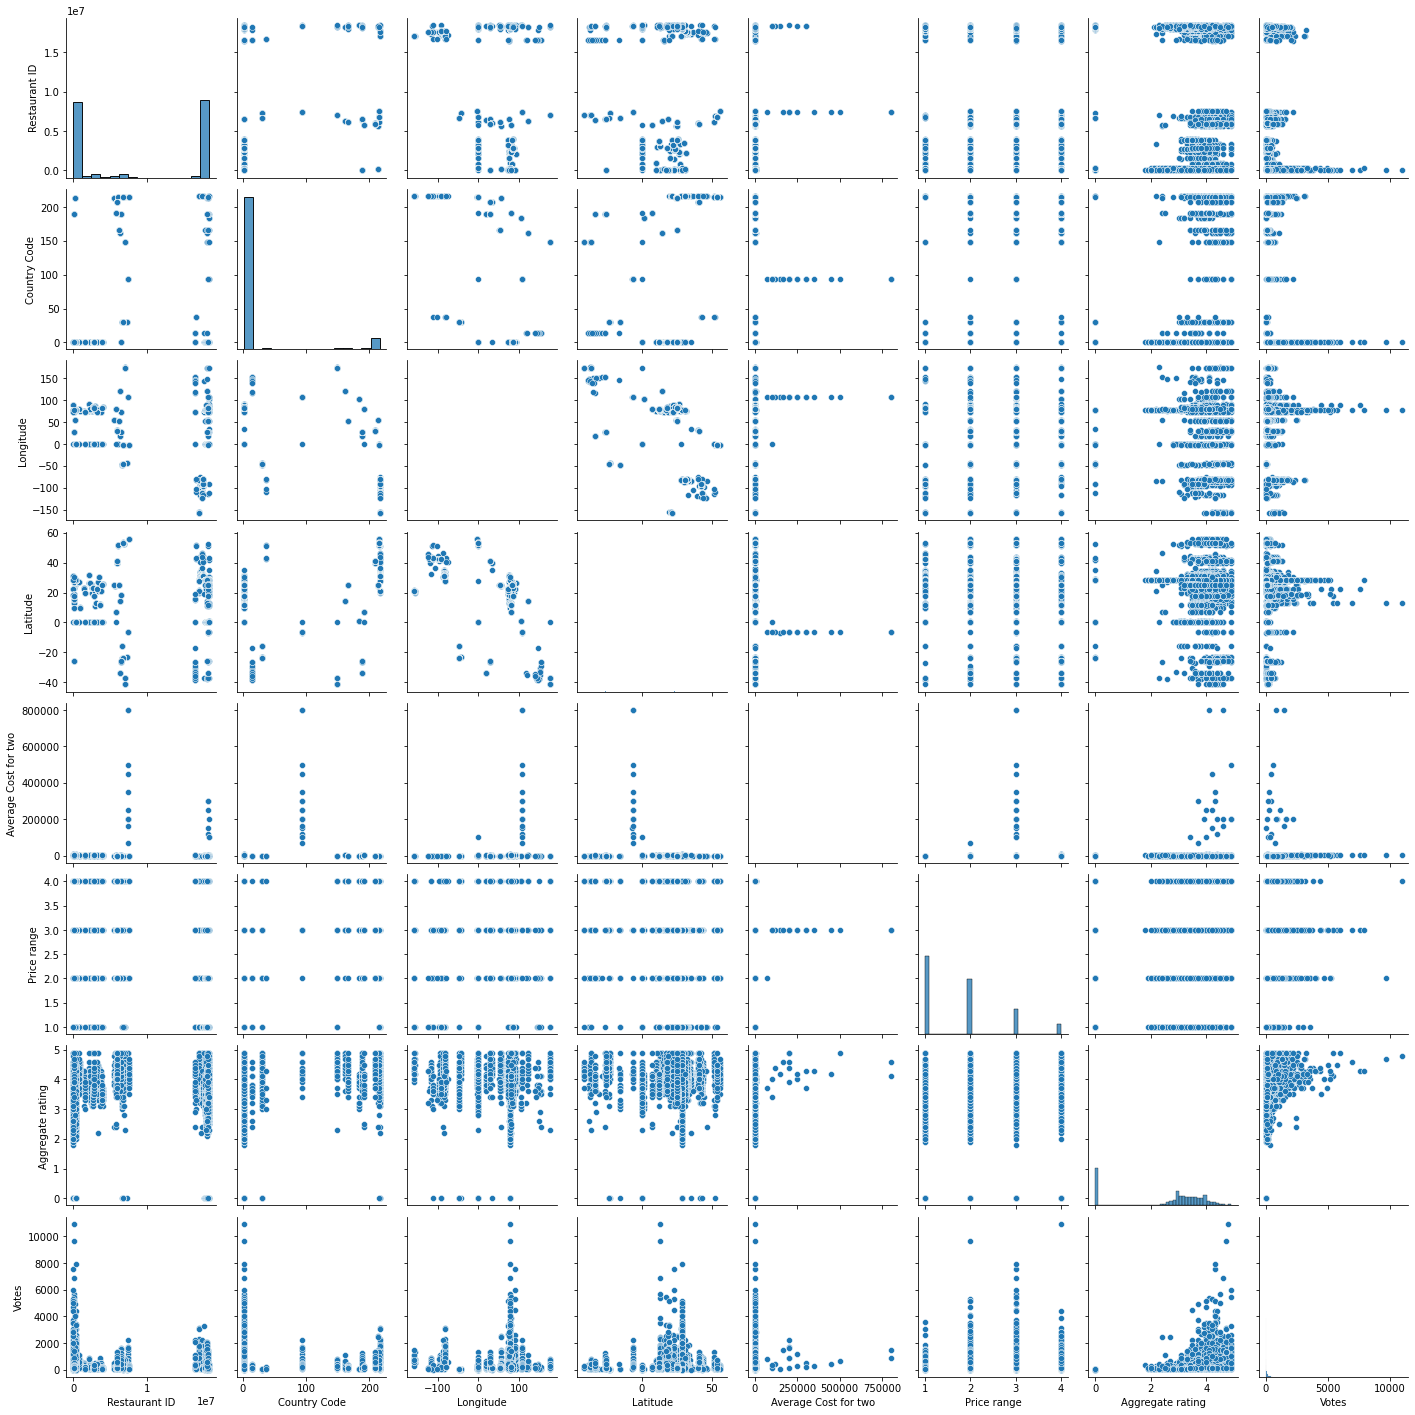

In [28]:
sns.pairplot(df)
plt.show()

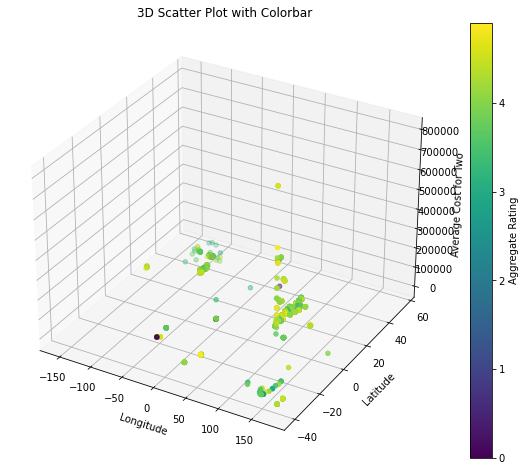

In [29]:
x = df['Longitude']
y = df['Latitude']
z = df['Average Cost for two']
colors = df['Aggregate rating']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=colors, cmap='viridis', marker='o')


cbar = plt.colorbar(sc)
cbar.set_label('Aggregate Rating')


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Average Cost for Two')


plt.title('3D Scatter Plot with Colorbar')
plt.show()

In [30]:
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


In [31]:
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['Longitude', 'Latitude', 'Aggregate rating']


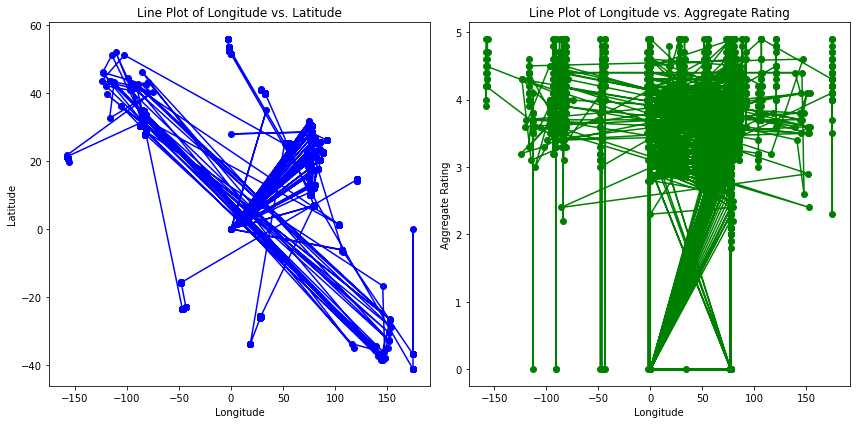

In [32]:
x_values = df['Longitude']
y_values = df['Latitude']
z_values = df['Aggregate rating']

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Line Plot of Longitude vs. Latitude')

plt.subplot(122)
plt.plot(x_values, z_values, marker='o', linestyle='-', color='g')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.title('Line Plot of Longitude vs. Aggregate Rating')

plt.tight_layout()
plt.show()

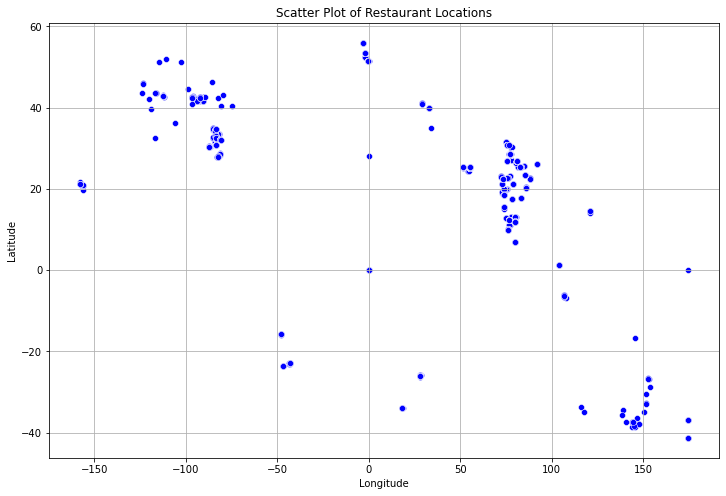

In [33]:
longitude = df['Longitude']
latitude = df['Latitude']

plt.figure(figsize=(12, 8))
sns.scatterplot(x=longitude, y=latitude, marker='o', color='b')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Restaurant Locations')


plt.grid(True)
plt.show()

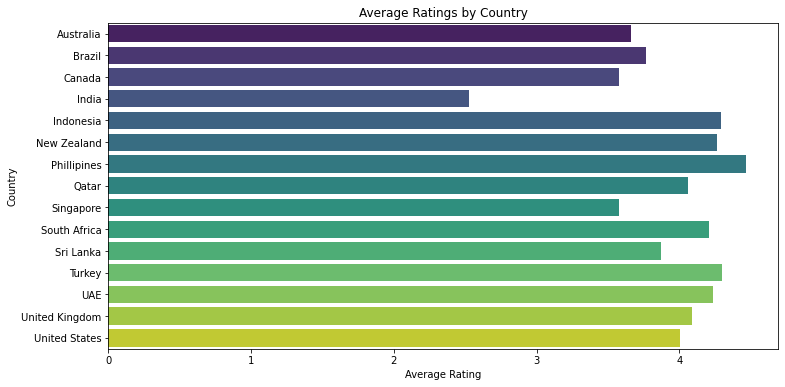

In [34]:
avg_ratings_by_country = df.groupby('Country')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='Country', data=avg_ratings_by_country, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.title('Average Ratings by Country')
plt.show()

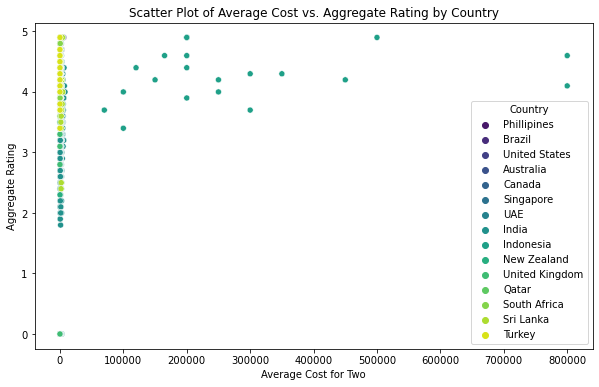

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', hue='Country', data=df, palette='viridis')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.title('Scatter Plot of Average Cost vs. Aggregate Rating by Country')
plt.show()

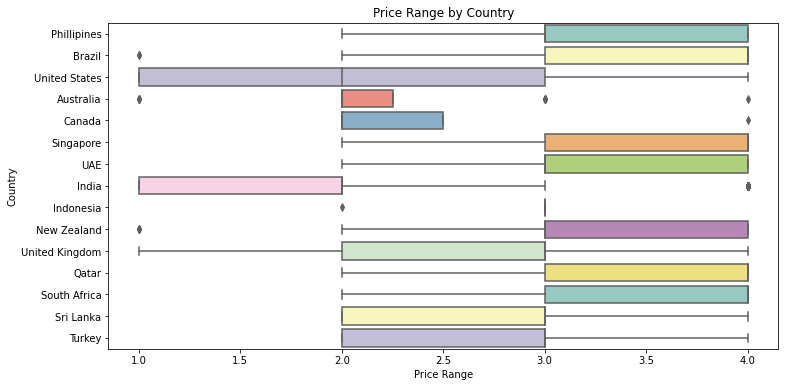

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Country', data=df, palette='Set3')
plt.xlabel('Price Range')
plt.ylabel('Country')
plt.title('Price Range by Country')
plt.show()

In [37]:
correlation = df.corr()
correlation

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


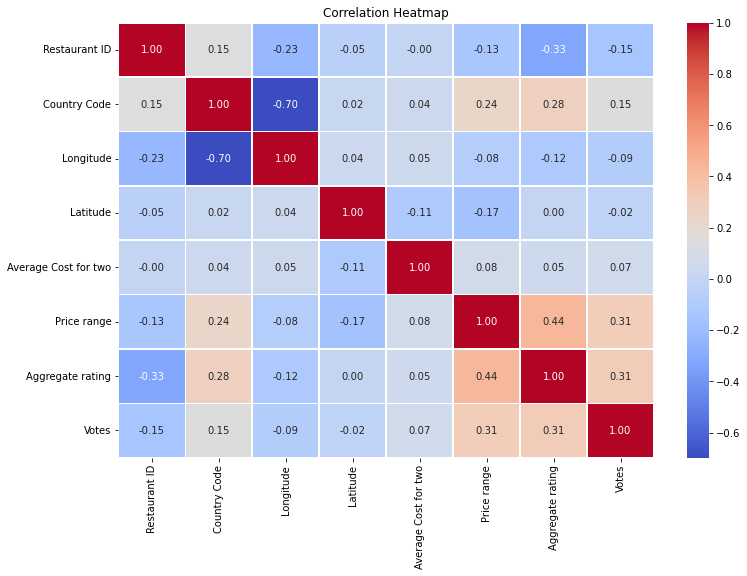

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [39]:
numeric_columns = df.select_dtypes(include=['number'])

skewness = numeric_columns.skew()

print("Skewness in the Dataset:")
print(skewness)

Skewness in the Dataset:
Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64


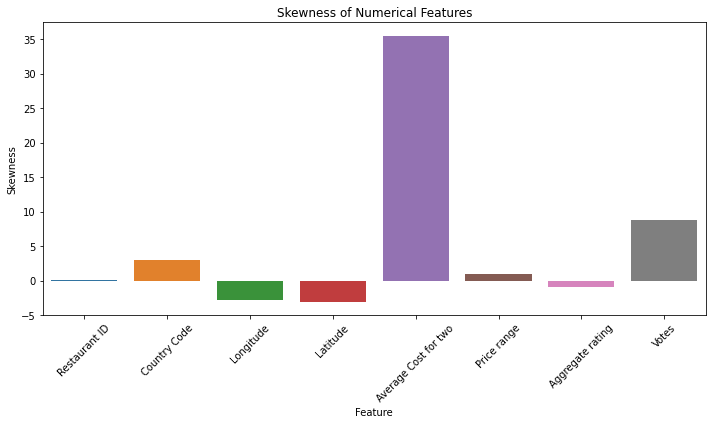

In [40]:
numeric_columns = df.select_dtypes(include=['number'])

skewness = numeric_columns.skew()

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.xticks(rotation=45)
plt.title("Skewness of Numerical Features")
plt.xlabel("Feature")
plt.ylabel("Skewness")
plt.tight_layout()

plt.show()

In [41]:
numeric_columns = df.select_dtypes(include=['number'])

summary_stats = numeric_columns.describe()

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000 

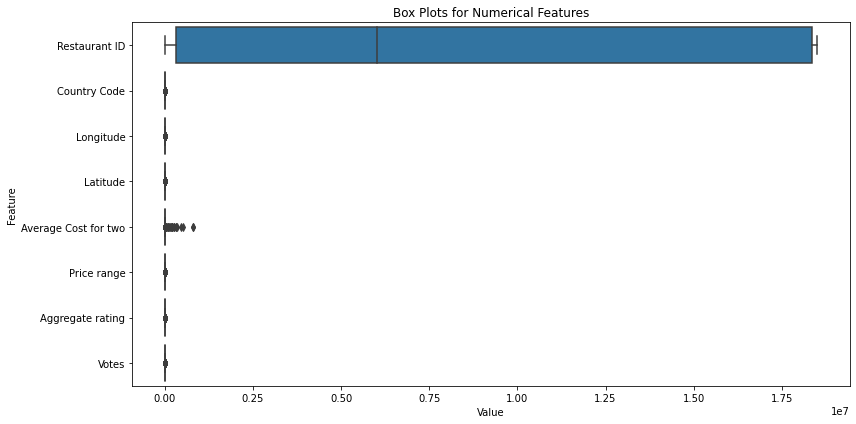

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient='h')
plt.title("Box Plots for Numerical Features")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.tight_layout()

plt.show()

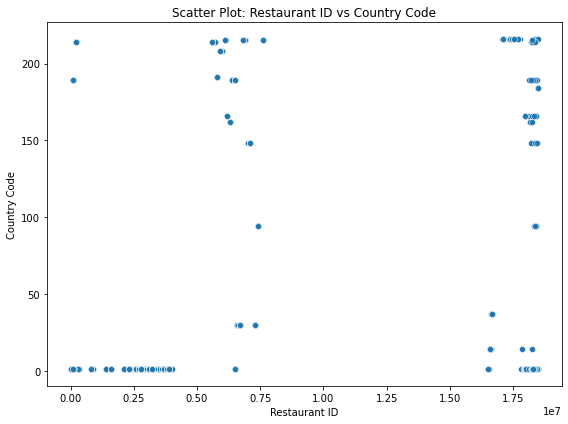

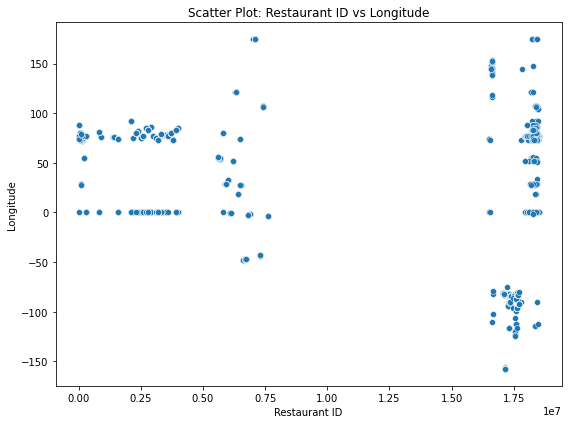

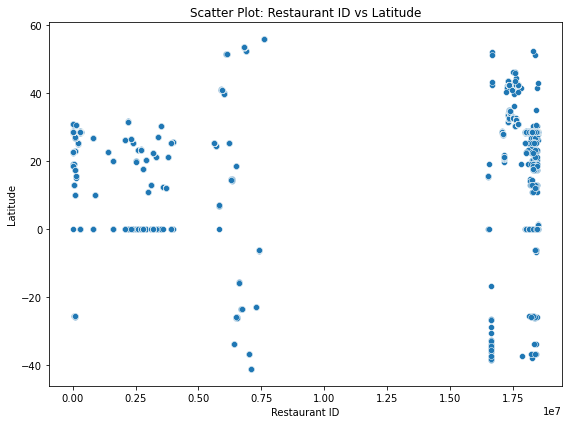

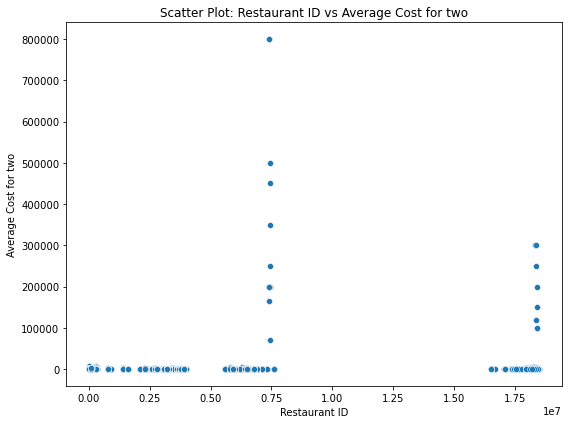

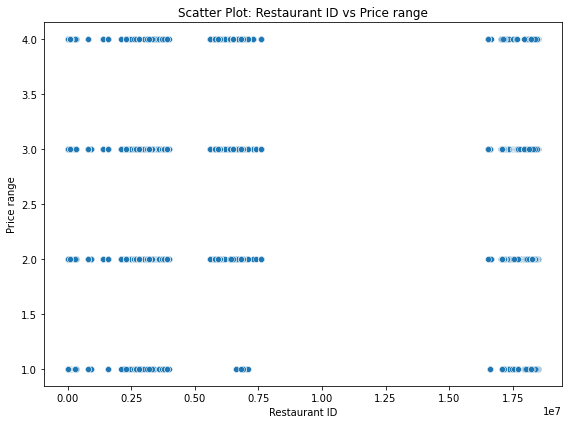

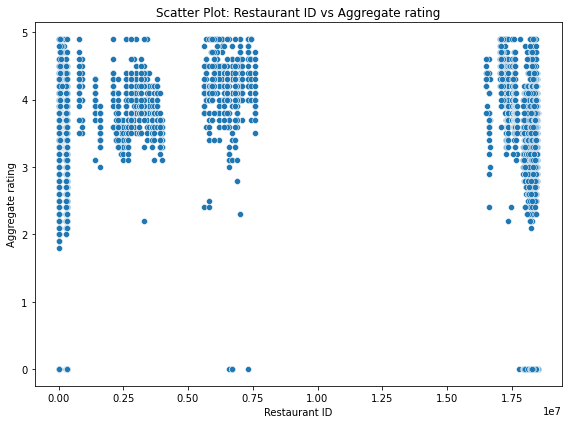

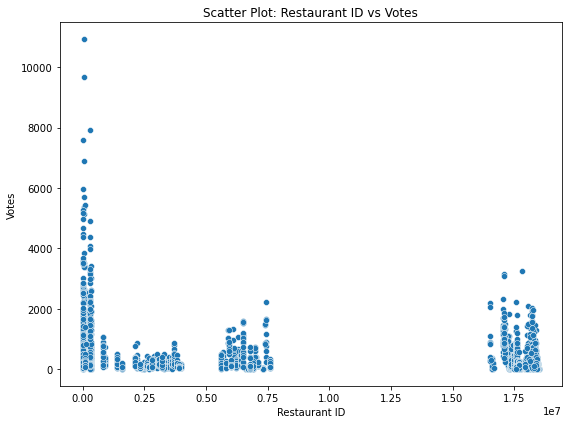

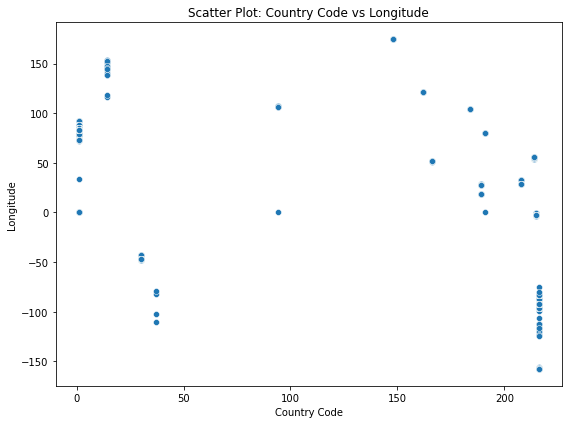

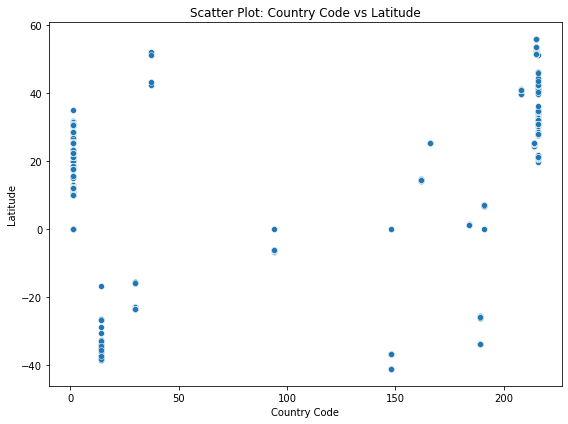

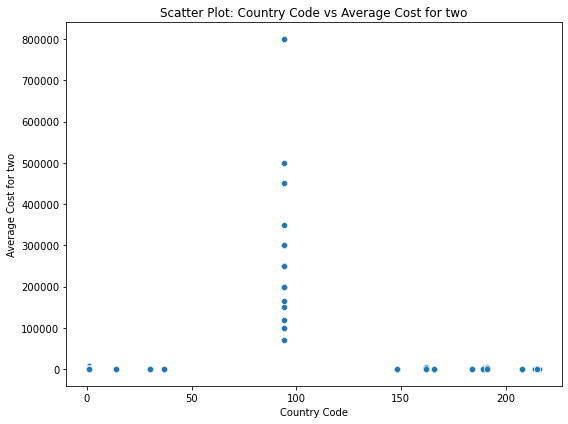

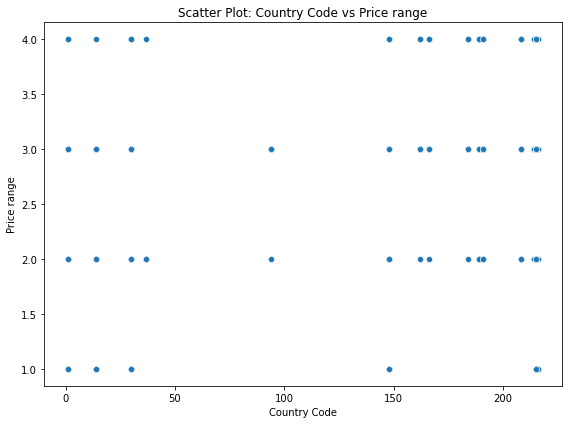

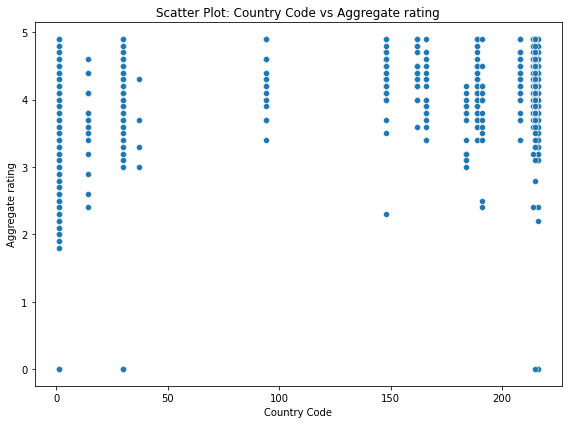

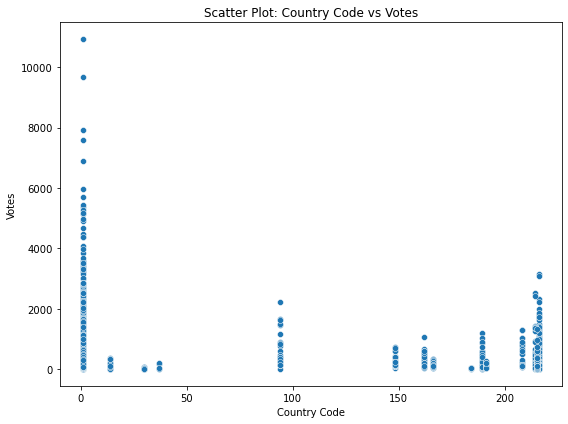

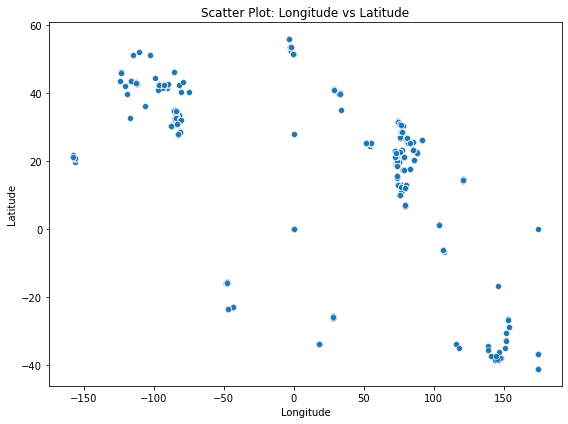

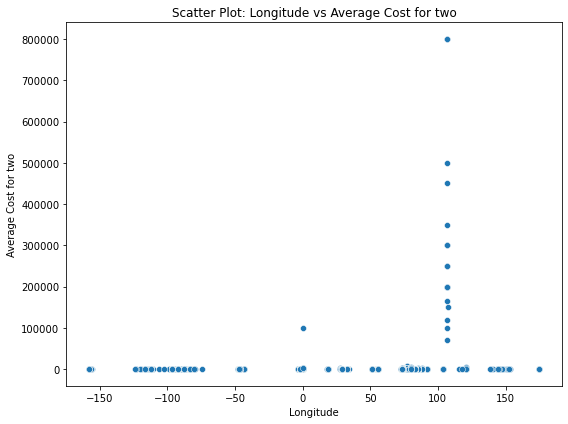

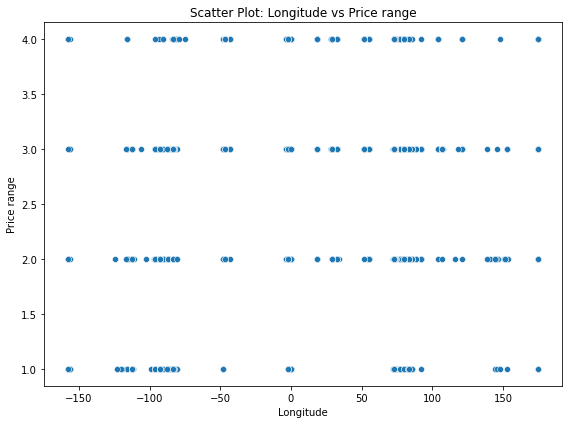

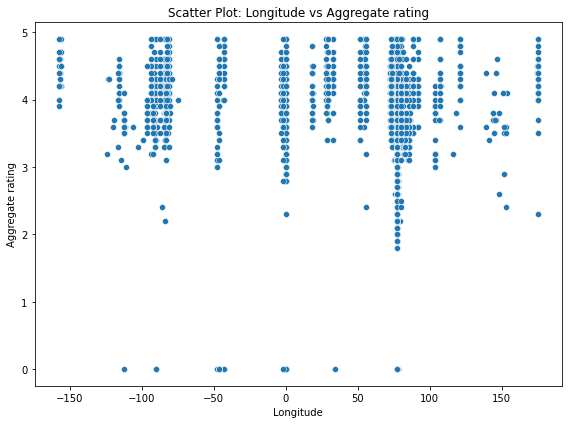

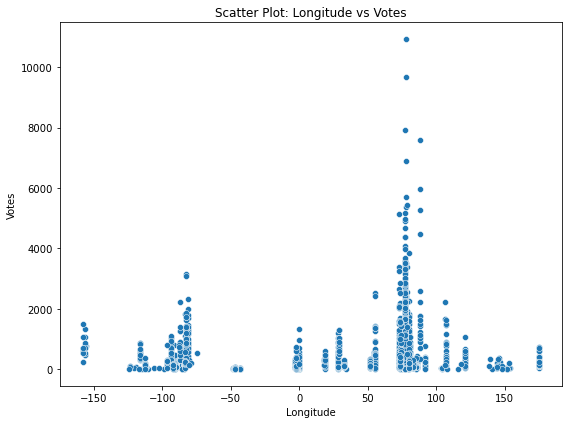

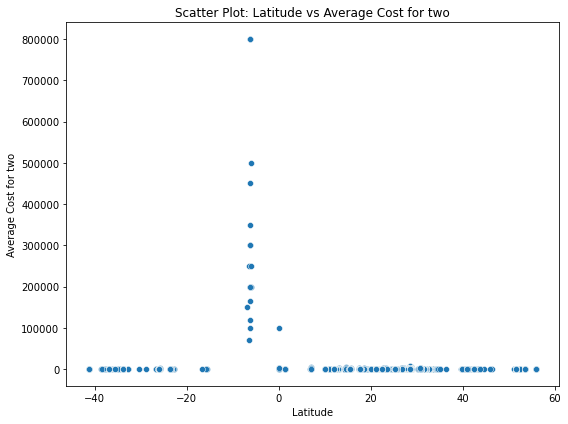

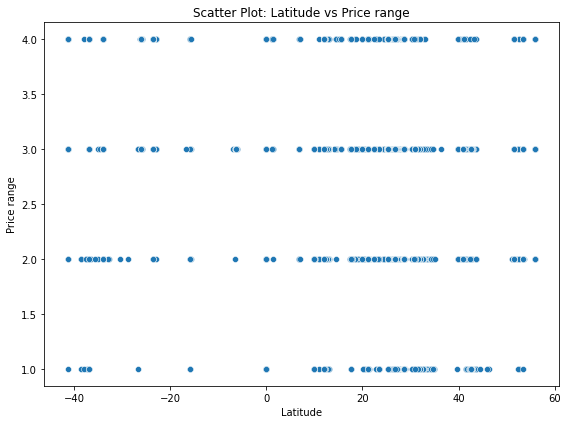

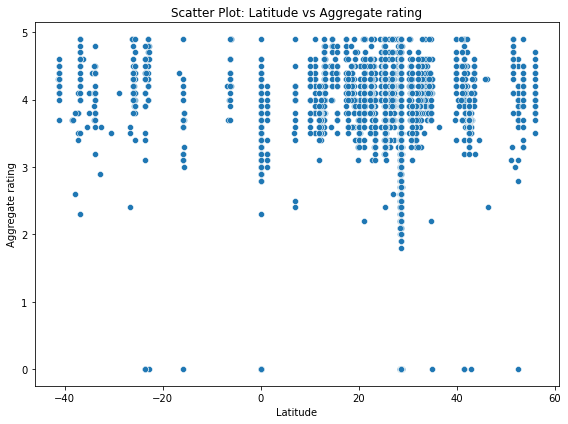

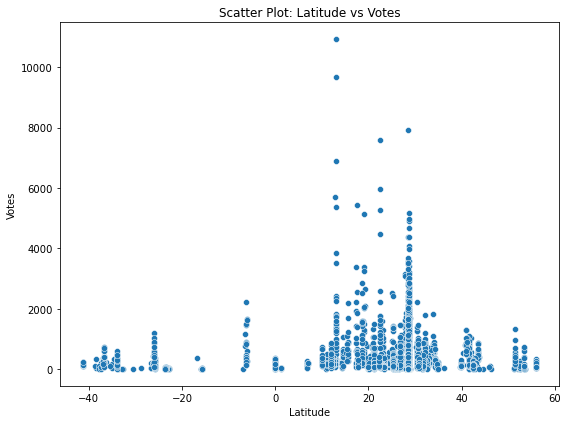

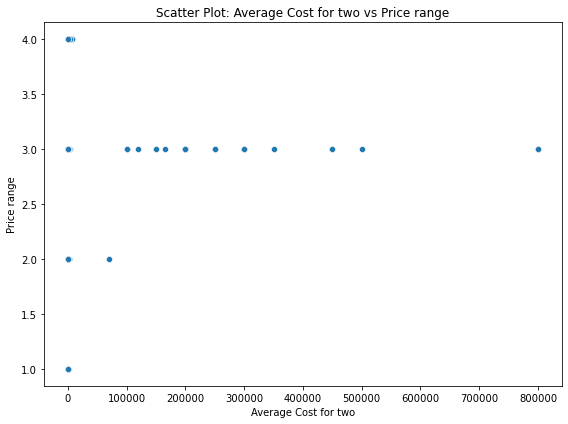

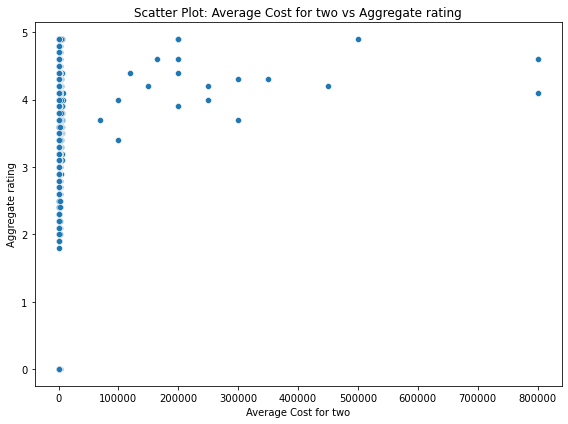

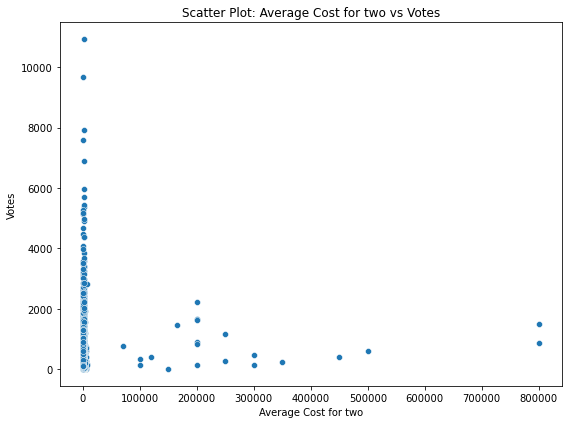

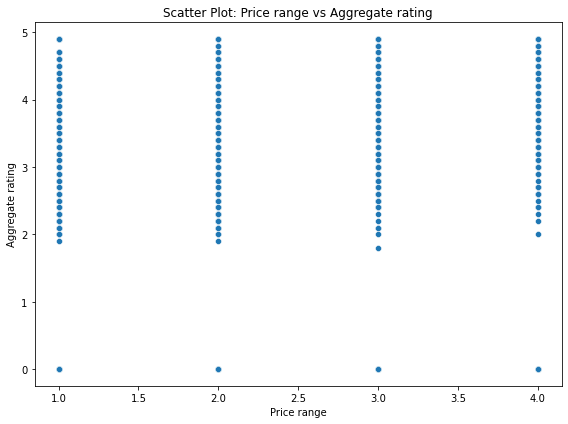

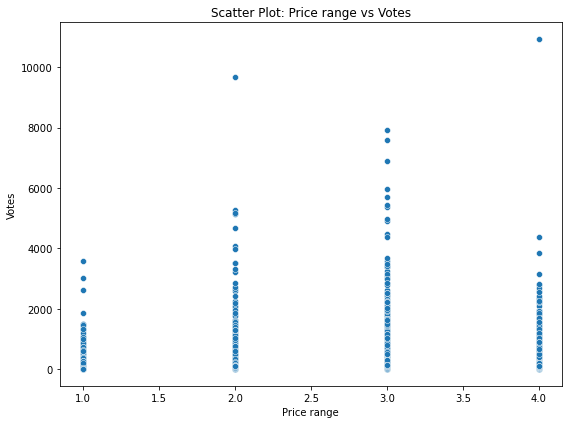

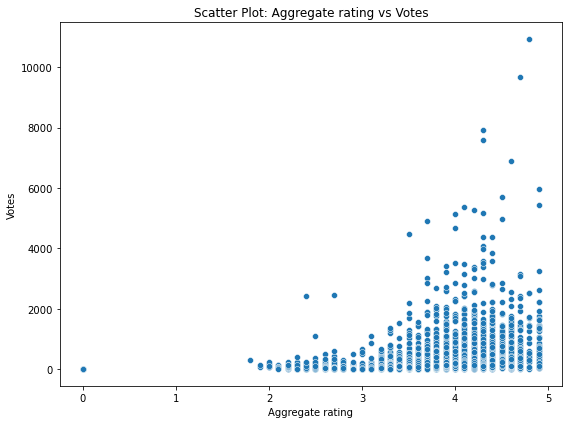

In [43]:
numeric_columns = df.select_dtypes(include=['number'])

numerical_column_names = numeric_columns.columns

for i in range(len(numerical_column_names)):
    for j in range(i + 1, len(numerical_column_names)):
        column1 = numerical_column_names[i]
        column2 = numerical_column_names[j]
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=column1, y=column2)
        plt.title(f"Scatter Plot: {column1} vs {column2}")
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.tight_layout()
        
        
        plt.show()

In [44]:
numerical_columns = ['Longitude', 'Latitude', 'Aggregate rating']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)

df_cleaned = df[~outlier_mask]

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (9551, 22)
Cleaned shape: (5695, 22)


In [45]:
label_encoder = LabelEncoder()

categorical_columns = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency',
                       'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu',
                       'Rating color', 'Rating text', 'Country']

for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
0        6317637             3749           162    73     8685       171   
1        6304287             3173           162    73     6055       593   
2        6300002             2897           162    75     4684       308   
3        6318506             4707           162    75     8690       862   
4        6314302             5523           162    75     8689       862   

   Locality Verbose   Longitude   Latitude  Cuisines  ...  Has Table booking  \
0               172  121.027535  14.565443       920  ...                  1   
1               601  121.014101  14.553708      1111  ...                  1   
2               314  121.056831  14.581404      1671  ...                  1   
3               875  121.056475  14.585318      1126  ...                  0   
4               875  121.057508  14.584450      1122  ...                  1   

   Has Online delivery  Is delivering now  Switch to order men

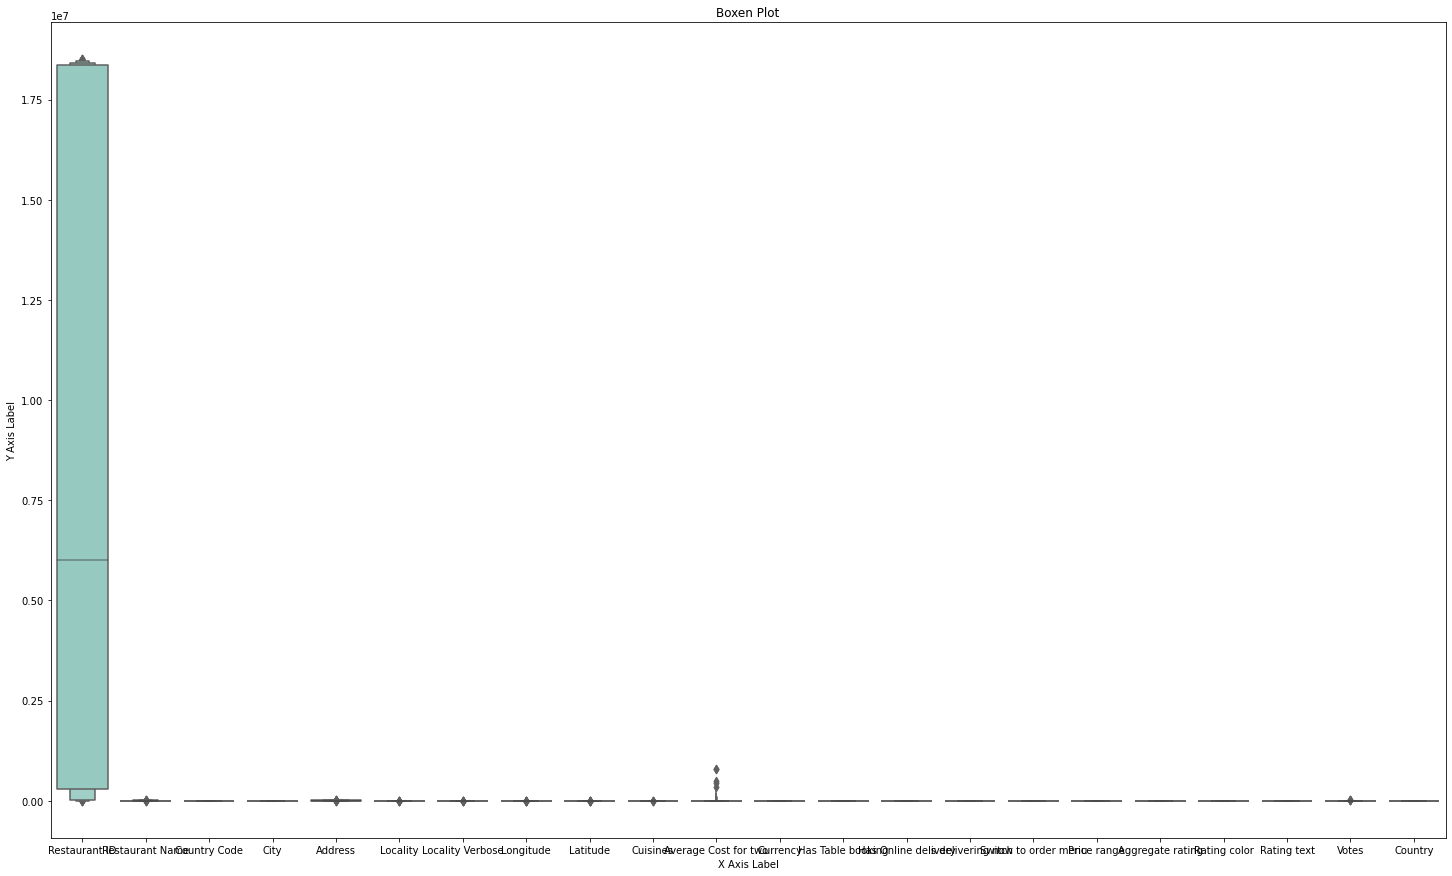

In [46]:
plt.figure(figsize=(25, 15)) 
sns.boxenplot(data=df, palette="Set3")
plt.xlabel("X Axis Label")
plt.ylabel("Y Axis Label")
plt.title("Boxen Plot")

plt.show()

Model Training

In [47]:
X_regression = df.drop(columns=['Average Cost for two'])
y_regression = df['Average Cost for two']

In [48]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

In [49]:
regression_model = LinearRegression()
regression_model.fit(X_train_regression, y_train_regression)

LinearRegression()

In [50]:
y_pred_regression = regression_model.predict(X_test_regression)

In [51]:
mse = mean_squared_error(y_test_regression, y_pred_regression)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 369710283.97


In [52]:
X_classification = df.drop(columns=['Price range'])
y_classification = df['Price range']

In [53]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

In [54]:
classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train_classification, y_train_classification)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_classification = classification_model.predict(X_test_classification)

In [56]:
accuracy = accuracy_score(y_test_classification, y_pred_classification)
print(accuracy)

0.9654631083202512


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

regressor.fit(X_train_regression, y_train_regression)

y_pred_regression = regressor.predict(X_test_regression)

mse = mean_squared_error(y_test_regression, y_pred_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_regression, y_pred_regression)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 19227.851777340955
R-squared (R2): 0.029970486564429355
